In [2]:
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/jashanjeetsingh/Downloads/train-balanced-sarcasm.csv')
print(df.head())

   label                                            comment     author   
0      0                                         NC and NH.  Trumpbart  \
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc   
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23  \
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [4]:
df.isnull().sum()

label              0
comment           55
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [31]:
df = df.dropna(axis=0)
df.isnull().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [5]:
df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


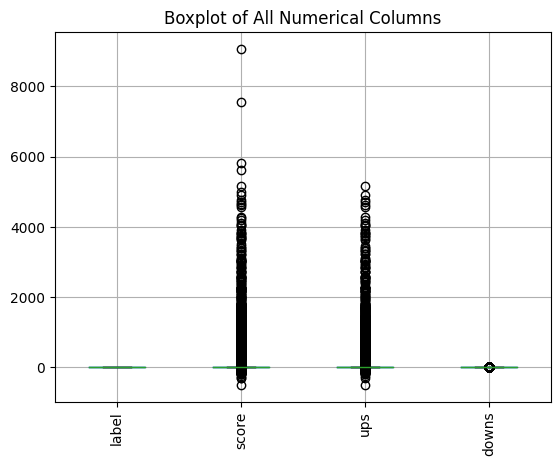

In [7]:
df.boxplot()
plt.title('Boxplot of All Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)
#error because the data is non numeric

ValueError: could not convert string to float: 'NC and NH.'

In [10]:
numeric_df = df.select_dtypes(include=[float, int]) 
print(numeric_df.head())
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
#Filtered out non-numeric columns and made a correlation matrix

   label  score  ups  downs
0      0      2   -1     -1
1      0     -4   -1     -1
2      0      3    3      0
3      0     -8   -1     -1
4      0      6   -1     -1
          label     score       ups     downs
label  1.000000 -0.010028 -0.006697  0.057546
score -0.010028  1.000000  0.849238 -0.013864
ups   -0.006697  0.849238  1.000000  0.065070
downs  0.057546 -0.013864  0.065070  1.000000


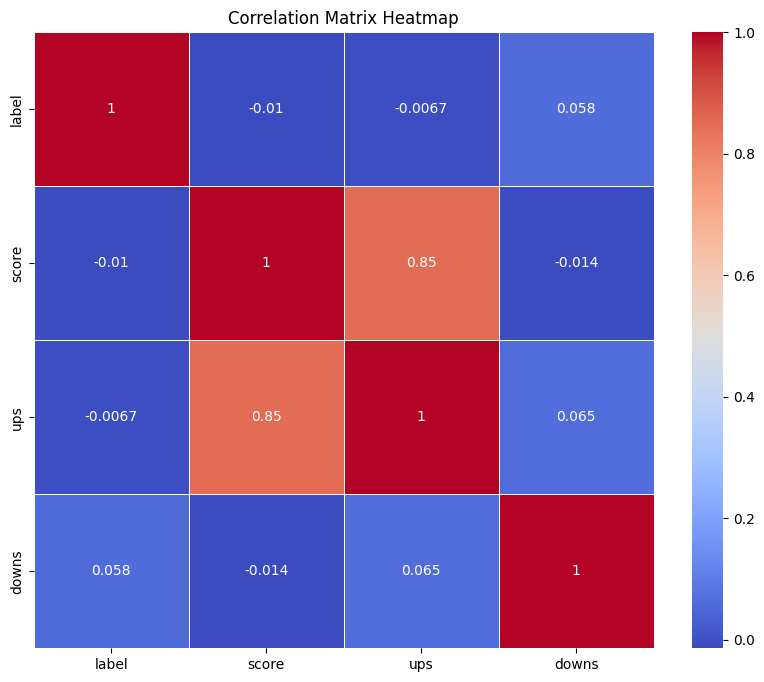

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
#decontract words
def decontracted(phrase):
    
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

# removing stopwords
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
            "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", 
            "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", 
            "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
            "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but",
            "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", 
            "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", 
            "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", 
            "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few",
            "more", "most", "other", "some", "such" "only", "own", "same", "so", "than", "too", "very", 
            "s", "t", "can", "will", "just", "don", "should", "now"]

def stopwords1(text):
    new_list=[]
    for word in text.split():
        if word in stop_words:
            new_list.append("")
        else:
            new_list.append(word)

    done=list(filter(None,new_list))
    done=" ".join(done)
    
    return done
# remove html tags
def remove_html(text):
    return re.sub(r'<.*?>',"",text)
def remove_punctuation(data):
    for char in string1:
        if char in data:
            data=data.replace(char," ")
    return data
# removing digits
def remove_numbers(text):
    return re.sub("\d+", "", text)

label
0    50.0
1    50.0
Name: proportion, dtype: float64


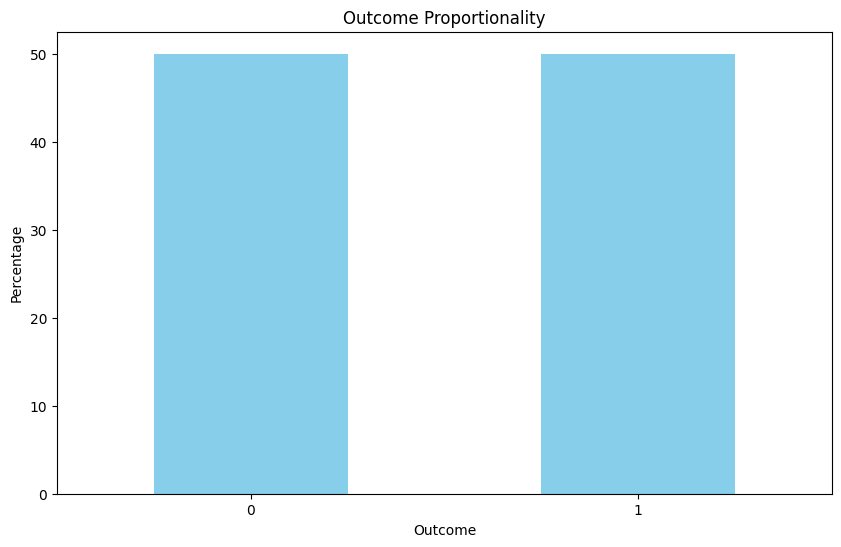

In [23]:
    outcome_counts = df['label'].value_counts(normalize=True) * 100
    print(outcome_counts)
    # Plotting the proportionality
    plt.figure(figsize=(10, 6))
    outcome_counts.plot(kind='bar', color='skyblue')
    plt.title('Outcome Proportionality')
    plt.xlabel('Outcome')
    plt.ylabel('Percentage')
    plt.xticks(rotation=0)
    plt.show()


In [29]:
def average_word_length():
    list2=[]
    for sentence in text:
        count=len(sentence)
        list2.append(count)
    avg_word_length=sum(list2)/len(text)
    
    return avg_word_length
def average_senetnce_length(text):
    sum1=0
    for sentence in text:
        count=len(sentence.split())
        sum1=sum1+count
        
    return (sum1/len(text))
def count_exclamation(text):
    sum1=0
    for i in text:
        if '!' in i:
            sum1=sum1+1
    return sum1

def count_question(text):
    sum1=0
    for i in text:
        if '?' in i:
            sum1=sum1+1
    return sum1


In [35]:
print("Original Data:")
print(df.head())

numeric_df = df.select_dtypes(include=[float, int])

print(numeric_df.head())

scaler = MinMaxScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

print("Scaled Data:")
print(df_scaled.head())

Original Data:
   label                                            comment     author   
0      0                                         NC and NH.  Trumpbart  \
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc   
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23  \
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this po

In [37]:
X = df.drop(columns=['label'])  
y = df['ups']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (808616, 9)
X_test shape: (202155, 9)
y_train shape: (808616,)
y_test shape: (202155,)


In [4]:
total_samples = len(df)
print(f"Total samples: {total_samples}")

Total samples: 1010826


In [5]:
number_of_rows = df.shape[0]
print(f"Number of rows in the dataset: {number_of_rows}")

Number of rows in the dataset: 1010826
